## 1. Import libraries and packages 

In [2]:
# Import libraries

import pandas as pd
import numpy as np

In [11]:
# Import more libraries

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics

In [4]:
# Import more libraries

from sklearn.feature_selection import RFE

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
sns.set_style('darkgrid')

In [15]:
os.chdir('C:/Mohit/Notes/MSBA - Clark University (Notes)/Sem-1/STAT 4600 - Intermediary Statistical Modeling for Analytics/Project/Final Report')

In [16]:
os.getcwd()


'C:\\Mohit\\Notes\\MSBA - Clark University (Notes)\\Sem-1\\STAT 4600 - Intermediary Statistical Modeling for Analytics\\Project\\Final Report'

## 2. Data Description

In [17]:
# Read and load the dataset
le = pd.read_csv("Life Expectancy Data.csv")

le.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [18]:
# General information of the modified dataset
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [19]:
# List the number of all columns and rows
le.shape

(2938, 22)

In [20]:
# List all the column names
le.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## 3. Data Cleaning and Preparation

In [21]:
# Modify the names of partial columns
le = le.rename(columns = {"Life expectancy ": "Life expectancy",
                           "Measles ": "Measles",
                           " BMI ": "BMI",
                           "under-five deaths ": "under-five deaths",
                           "Diphtheria ": "Diphtheria",
                           " HIV/AIDS": "HIV", 
                           " thinness  1-19 years": "thinness 1-19 years",
                           " thinness 5-9 years": "thinness 5-9 years"})
le.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV         GDP  Population  \
0    6.0               8.16        65.0  0.1  584.259210  33736494.0   
1   58.0               8.18        62.0  0.1  612.696514    327582.0   
2   62.0               8.13        64.0  0.1  631.744976  31731688.0   
3   67.0               8.52        67.0  0.1  669.959000   3696958.0   
4   68.0               7.87        68.0  0.1   63.537231   2978599.0   

   thinness 1-19 years  thinness 5-9 years  Income composition of resources  \
0                 17.2                17.3                            0.479   
1                 17.5                17.5                            0.476   
2                 17.7                17.7                            0.470   
3                 17.9                18.0                            0.463   
4                 18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

In [22]:
# Check the numbers of all missing data from each column
le.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV                                  0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [23]:
# Run the descriptive analysis on the dataset
le.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        Diphtheria          HIV            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness 1-19 years  thinness 5-9 years  \
count          2904.000000         2904.000000   
mean              4.839704            4.870317   
std               4.420195            4.508882   
min               0.100000            0.100000   
25%               1.600000            1.500000   
50%               3.300000            3.300000   
75%               7.200000            7.200000   
max              27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [25]:
# Normalization and cleaning - replace the Null Values with mean values of the modified dataset

le['Life expectancy'] = le['Life expectancy'].fillna(le['Life expectancy'].mean())
le['Adult Mortality'] = le['Adult Mortality'].fillna(le['Adult Mortality'].mean())
le['Alcohol'] = le['Alcohol'].fillna(le['Alcohol'].mean())
le['Hepatitis B'] = le['Hepatitis B'].fillna(le['Hepatitis B'].mean())
le['BMI'] = le['BMI'].fillna(le['BMI'].mean())
le['Polio'] = le['Polio'].fillna(le['Polio'].mean())
le['Total expenditure'] = le['Total expenditure'].fillna(le['Total expenditure'].mean())
le['Diphtheria'] = le['Diphtheria'].fillna(le['Diphtheria'].mean())
le['GDP'] = le['GDP'].fillna(le['GDP'].mean())
le['Population'] = le['Population'].fillna(le['Population'].mean())
le['thinness 1-19 years'] = le['thinness 1-19 years'].fillna(le['thinness 1-19 years'].mean())
le['thinness 5-9 years'] = le['thinness 5-9 years'].fillna(le['thinness 5-9 years'].mean())
le['Income composition of resources'] = le['Income composition of resources'].fillna(le['Income composition of resources'].mean())
le['Schooling'] = le['Schooling'].fillna(le['Schooling'].mean())

In [26]:
# Check again the numbers of all missing data from each column
le.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV                                0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [27]:
# Run again the descriptive analysis on the dataset
le.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.507640       124.080302     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.200000        74.000000       0.000000   
50%    2008.000000        72.000000       144.000000       3.000000   
75%    2012.000000        75.600000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       3.916288             1987.914858    22.586855   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       1.092500                4.685343    80.940461       0.000000   
50%       4.160000               64.912906    87.000000      17.000000   
75%       7.390000              441.534144    96.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2938.000000        2938.000000  2938.000000        2938.000000   
mean     38.321247          42.035739    82.550188           5.938190   
std      19.927677         160.445548    23.352143           2.400274   
min       1.000000           0.000000     3.000000           0.370000   
25%      19.400000           0.000000    78.000000           4.370000   
50%      43.000000           4.000000    93.000000           5.938190   
75%      56.100000          28.000000    97.000000           7.330000   
max      87.300000        2500.000000    99.000000          17.600000   

        Diphtheria          HIV            GDP    Population  \
count  2938.000000  2938.000000    2938.000000  2.938000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.640073     5.077785   13136.800417  5.381546e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     580.486996  4.189172e+05   
50%      93.000000     0.100000    3116.561755  3.675929e+06   
75%      97.000000     0.800000    7483.158469  1.275338e+07   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness 1-19 years  thinness 5-9 years  \
count          2938.000000         2938.000000   
mean              4.839704            4.870317   
std               4.394535            4.482708   
min               0.100000            0.100000   
25%               1.600000            1.600000   
50%               3.400000            3.400000   
75%               7.100000            7.200000   
max              27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2938.000000  2938.000000  
mean                          0.627551    11.992793  
std                           0.204820     3.264381  
min                           0.000000     0.000000  
25%                           0.504250    10.300000  
50%                           0.662000    12.100000  
75%                           0.772000    14.100000  
max                           0.948000    20.700000

In [28]:
# Drop "Country" column for multiple linear regression model dataset,
# because our purpose is to see the difference between developed and developing countries.
# Since there is a column that separates the category of countries, we do not need to use the "Country" column.  

le_0 = le.drop(['Country'], axis=1)
le_0.head()

Year      Status  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0  2015  Developing             65.0            263.0             62     0.01   
1  2014  Developing             59.9            271.0             64     0.01   
2  2013  Developing             59.9            268.0             66     0.01   
3  2012  Developing             59.5            272.0             69     0.01   
4  2011  Developing             59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  ...  Polio  \
0               71.279624         65.0     1154  19.1  ...    6.0   
1               73.523582         62.0      492  18.6  ...   58.0   
2               73.219243         64.0      430  18.1  ...   62.0   
3               78.184215         67.0     2787  17.6  ...   67.0   
4                7.097109         68.0     3013  17.2  ...   68.0   

   Total expenditure  Diphtheria  HIV         GDP  Population  \
0               8.16        65.0  0.1  584.259210  33736494.0   
1               8.18        62.0  0.1  612.696514    327582.0   
2               8.13        64.0  0.1  631.744976  31731688.0   
3               8.52        67.0  0.1  669.959000   3696958.0   
4               7.87        68.0  0.1   63.537231   2978599.0   

   thinness 1-19 years  thinness 5-9 years  Income composition of resources  \
0                 17.2                17.3                            0.479   
1                 17.5                17.5                            0.476   
2                 17.7                17.7                            0.470   
3                 17.9                18.0                            0.463   
4                 18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 21 columns]

In [29]:
# Copy regression model dataset
le_rgs = le_0.copy(deep=True)
le_rgs.head()

Year      Status  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0  2015  Developing             65.0            263.0             62     0.01   
1  2014  Developing             59.9            271.0             64     0.01   
2  2013  Developing             59.9            268.0             66     0.01   
3  2012  Developing             59.5            272.0             69     0.01   
4  2011  Developing             59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  ...  Polio  \
0               71.279624         65.0     1154  19.1  ...    6.0   
1               73.523582         62.0      492  18.6  ...   58.0   
2               73.219243         64.0      430  18.1  ...   62.0   
3               78.184215         67.0     2787  17.6  ...   67.0   
4                7.097109         68.0     3013  17.2  ...   68.0   

   Total expenditure  Diphtheria  HIV         GDP  Population  \
0               8.16        65.0  0.1  584.259210  33736494.0   
1               8.18        62.0  0.1  612.696514    327582.0   
2               8.13        64.0  0.1  631.744976  31731688.0   
3               8.52        67.0  0.1  669.959000   3696958.0   
4               7.87        68.0  0.1   63.537231   2978599.0   

   thinness 1-19 years  thinness 5-9 years  Income composition of resources  \
0                 17.2                17.3                            0.479   
1                 17.5                17.5                            0.476   
2                 17.7                17.7                            0.470   
3                 17.9                18.0                            0.463   
4                 18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 21 columns]

In [30]:
# Label Encoding for object to numeric conversion
objList = le_rgs.select_dtypes(include = "object").columns
objList

from sklearn.preprocessing import LabelEncoder
le_0 = LabelEncoder()

for feat in objList:
    le_rgs[feat] = le_0.fit_transform(le_rgs[feat].astype(str))

le_rgs.head()

Year  Status  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0  2015       1             65.0            263.0             62     0.01   
1  2014       1             59.9            271.0             64     0.01   
2  2013       1             59.9            268.0             66     0.01   
3  2012       1             59.5            272.0             69     0.01   
4  2011       1             59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  ...  Polio  \
0               71.279624         65.0     1154  19.1  ...    6.0   
1               73.523582         62.0      492  18.6  ...   58.0   
2               73.219243         64.0      430  18.1  ...   62.0   
3               78.184215         67.0     2787  17.6  ...   67.0   
4                7.097109         68.0     3013  17.2  ...   68.0   

   Total expenditure  Diphtheria  HIV         GDP  Population  \
0               8.16        65.0  0.1  584.259210  33736494.0   
1               8.18        62.0  0.1  612.696514    327582.0   
2               8.13        64.0  0.1  631.744976  31731688.0   
3               8.52        67.0  0.1  669.959000   3696958.0   
4               7.87        68.0  0.1   63.537231   2978599.0   

   thinness 1-19 years  thinness 5-9 years  Income composition of resources  \
0                 17.2                17.3                            0.479   
1                 17.5                17.5                            0.476   
2                 17.7                17.7                            0.470   
3                 17.9                18.0                            0.463   
4                 18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 21 columns]

In [31]:
# List the number of all columns and rows of the regression dataset
le_rgs.shape

(2938, 21)

In [32]:
# List all the column names of regression model dataset
le_rgs.columns

Index(['Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## 4. Modeling, Visualization, and Analysis

### 4.1 Correlation and Correlation Matrix (Heatmap)

In [33]:
# See the correlation of the modified dataset

le_rgs.corr()

Year    Status  Life expectancy  \
Year                             1.000000  0.001864         0.169623   
Status                           0.001864  1.000000        -0.481962   
Life expectancy                  0.169623 -0.481962         1.000000   
Adult Mortality                 -0.078861  0.315171        -0.696359   
infant deaths                   -0.037415  0.112252        -0.196535   
Alcohol                         -0.048168 -0.579371         0.391598   
percentage expenditure           0.031400 -0.454261         0.381791   
Hepatitis B                      0.089398 -0.095642         0.203771   
Measles                         -0.082493  0.076955        -0.157574   
BMI                              0.108327 -0.310873         0.559255   
under-five deaths               -0.042937  0.115195        -0.222503   
Polio                            0.093820 -0.220098         0.461574   
Total expenditure                0.081860 -0.289985         0.207981   
Diphtheria                       0.133853 -0.216763         0.475418   
HIV                             -0.139741  0.148590        -0.556457   
GDP                              0.093351 -0.445911         0.430493   
Population                       0.014951  0.041091        -0.019638   
thinness 1-19 years             -0.047592  0.367934        -0.472162   
thinness 5-9 years              -0.050627  0.366297        -0.466629   
Income composition of resources  0.236333 -0.457302         0.692483   
Schooling                        0.203471 -0.491444         0.715066   

                                 Adult Mortality  infant deaths   Alcohol  \
Year                                   -0.078861      -0.037415 -0.048168   
Status                                  0.315171       0.112252 -0.579371   
Life expectancy                        -0.696359      -0.196535  0.391598   
Adult Mortality                         1.000000       0.078747 -0.190408   
infant deaths                           0.078747       1.000000 -0.113812   
Alcohol                                -0.190408      -0.113812  1.000000   
percentage expenditure                 -0.242814      -0.085612  0.339634   
Hepatitis B                            -0.138591      -0.178783  0.075447   
Measles                                 0.031174       0.501128 -0.051055   
BMI                                    -0.381449      -0.227220  0.318070   
under-five deaths                       0.094135       0.996629 -0.110777   
Polio                                  -0.272694      -0.170674  0.213744   
Total expenditure                      -0.110875      -0.126564  0.294898   
Diphtheria                             -0.273014      -0.175156  0.215242   
HIV                                     0.523727       0.025231 -0.048650   
GDP                                    -0.277053      -0.107109  0.318591   
Population                             -0.012501       0.548522 -0.030765   
thinness 1-19 years                     0.299863       0.465590 -0.416946   
thinness 5-9 years                      0.305366       0.471228 -0.405881   
Income composition of resources        -0.440062      -0.143663  0.416099   
Schooling                              -0.435108      -0.191757  0.497546   

                                 percentage expenditure  Hepatitis B  \
Year                                           0.031400     0.089398   
Status                                        -0.454261    -0.095642   
Life expectancy                                0.381791     0.203771   
Adult Mortality                               -0.242814    -0.138591   
infant deaths                                 -0.085612    -0.178783   
Alcohol                                        0.339634     0.075447   
percentage expenditure                         1.000000     0.011679   
Hepatitis B                                    0.011679     1.000000   
Measles                                       -0.056596    -0.090317   
BMI                                  

#### Figure 1

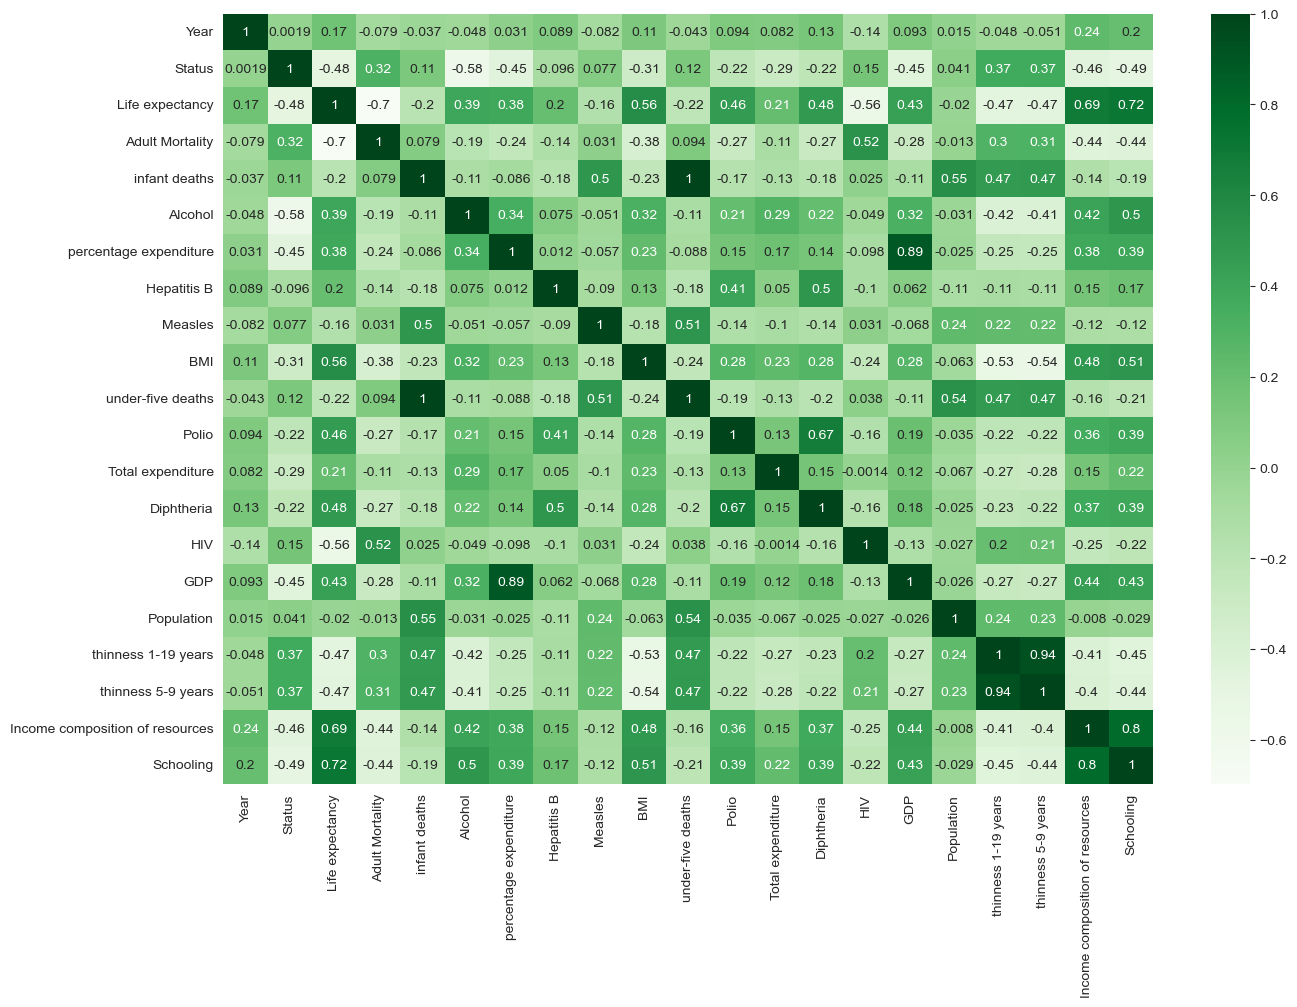

In [34]:
# Generate the heatmap based on the correlation of the dataset
plt.figure(figsize=(15,10))
sns.heatmap(le_rgs.corr(),annot=True,cmap='Greens')
plt.show()

### 4.2 Multiple Linear Regression Model  

#### 4.2.1 Regression Model of Complete Dataset

In [35]:
# Splitting the dataset
x = le_rgs.drop('Life expectancy',axis= 1)
y = le_rgs['Life expectancy']

# Creating train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=101)

In [36]:
# Fitting the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(x_train,y_train)

#### Figure 2

In [37]:
# Run the regression model and see the results 

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     663.3
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:11:20   Log-Likelihood:                -8268.0
No. Observations:                2938   AIC:                         1.658e+04
Df Residuals:                    2917   BIC:                         1.670e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

#### 4.2.2 Regression Model of Modified Dataset

In [38]:
# Drop partial columns that have the p-values that are larger than 5% for multiple linear regression model dataset

le_rgs_mod = le_rgs.drop(['Year', 'Population', 'percentage expenditure', 'thinness 1-19 years','thinness 5-9 years', 'Total expenditure'], axis=1)
le_rgs_mod.head()

Status  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0       1             65.0            263.0             62     0.01   
1       1             59.9            271.0             64     0.01   
2       1             59.9            268.0             66     0.01   
3       1             59.5            272.0             69     0.01   
4       1             59.2            275.0             71     0.01   

   Hepatitis B  Measles   BMI  under-five deaths  Polio  Diphtheria  HIV  \
0         65.0     1154  19.1                 83    6.0        65.0  0.1   
1         62.0      492  18.6                 86   58.0        62.0  0.1   
2         64.0      430  18.1                 89   62.0        64.0  0.1   
3         67.0     2787  17.6                 93   67.0        67.0  0.1   
4         68.0     3013  17.2                 97   68.0        68.0  0.1   

          GDP  Income composition of resources  Schooling  
0  584.259210                            0.479       10.1  
1  612.696514                            0.476       10.0  
2  631.744976                            0.470        9.9  
3  669.959000                            0.463        9.8  
4   63.537231                            0.454        9.5

In [39]:
# Splitting the dataset
x = le_rgs_mod.drop('Life expectancy',axis= 1)
y = le_rgs_mod['Life expectancy']

# Creating train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=101)

In [40]:
# Fitting the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(x_train,y_train)

#### Figure 3

In [41]:
x = sm.add_constant(x) # adding a constant 
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     942.9
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:11:28   Log-Likelihood:                -8276.4
No. Observations:                2938   AIC:                         1.658e+04
Df Residuals:                    2923   BIC:                         1.667e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

#### Figure 4

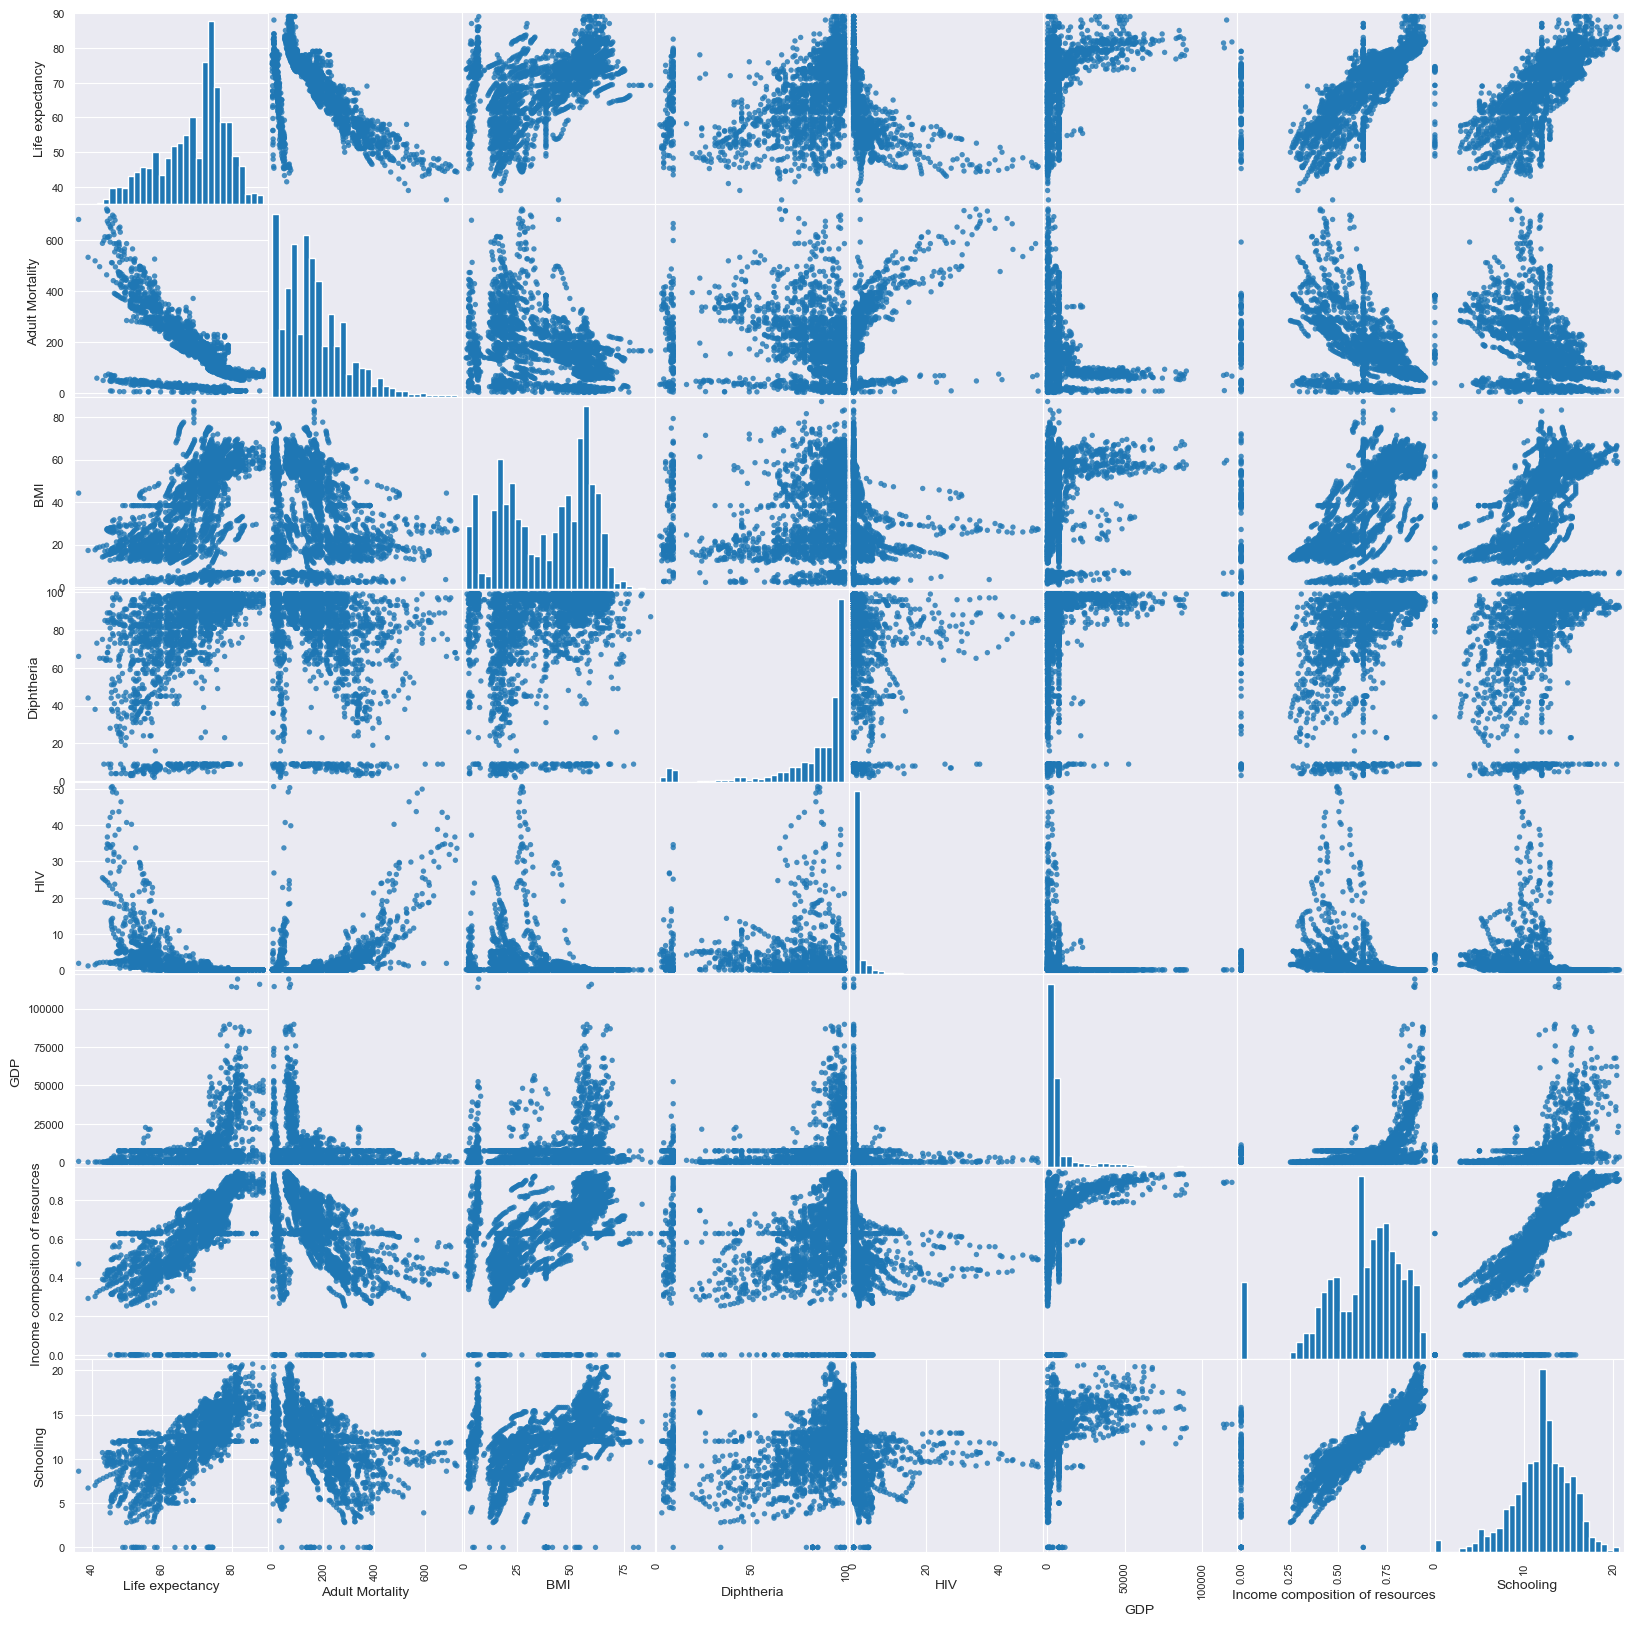

In [42]:
# Build the scatter plot matrix based on correlation heatmap and regression model 

le_rgs_sub = le_rgs.filter(items=['Life expectancy', 'Adult Mortality', 'BMI', 'Diphtheria', 'HIV', 'GDP', 
                             'Income composition of resources', 'Schooling'])

stplot = pd.plotting.scatter_matrix(le_rgs_sub, figsize=(20, 20), marker='.',
                                 hist_kwds={'bins': 30}, s=60, alpha=.8)

### 4.3 Data Visualization

#### Figure 5

<AxesSubplot:xlabel='Life expectancy', ylabel='Density'>

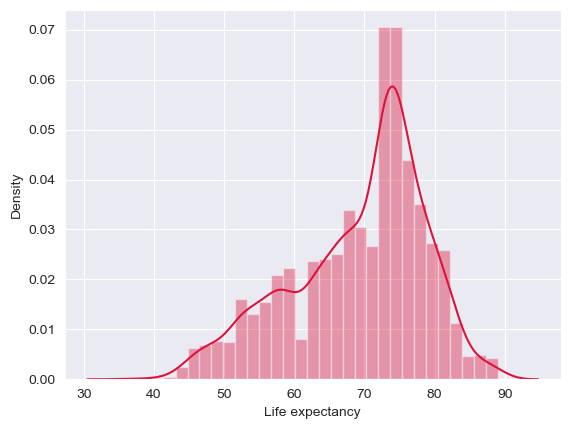

In [43]:
# Histogram of Life Expectancy

sns.distplot(le['Life expectancy'], color="Crimson")

#### Figure 6

<AxesSubplot:xlabel='Adult Mortality', ylabel='Density'>

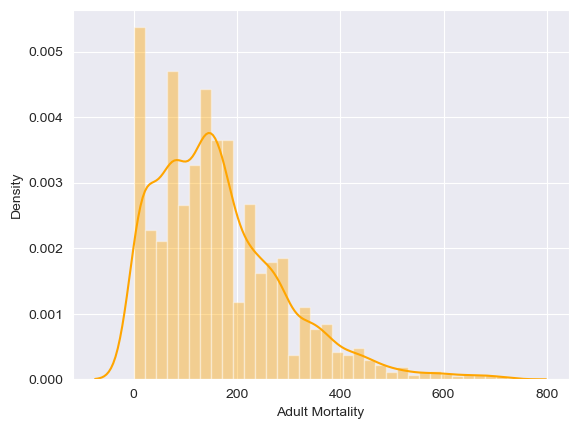

In [44]:
# Histogram of Adult Mortality

sns.distplot(le['Adult Mortality'], color="Orange")

#### Figure 7

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

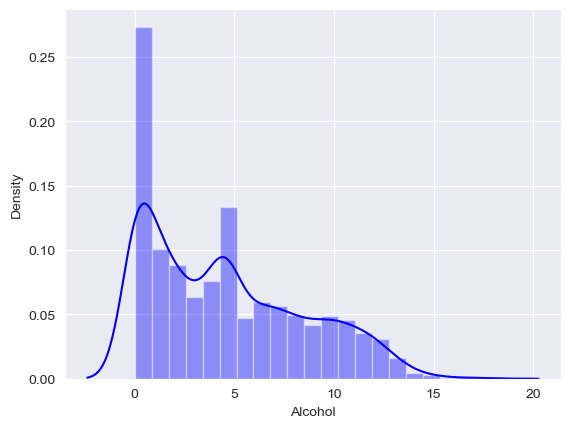

In [45]:
# Histogram of Alcohol

sns.distplot(le['Alcohol'], color="Blue")

#### Figure 8

<AxesSubplot:xlabel='Diphtheria', ylabel='Density'>

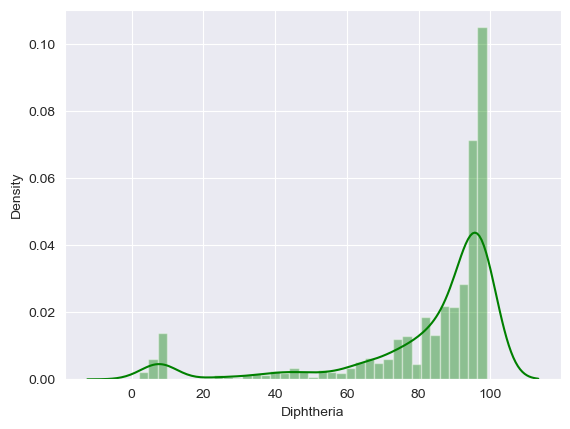

In [46]:
# Histogram of Diphtheria

sns.distplot(le['Diphtheria'], color="Green")

#### Figure 9

<AxesSubplot:xlabel='Schooling', ylabel='Density'>

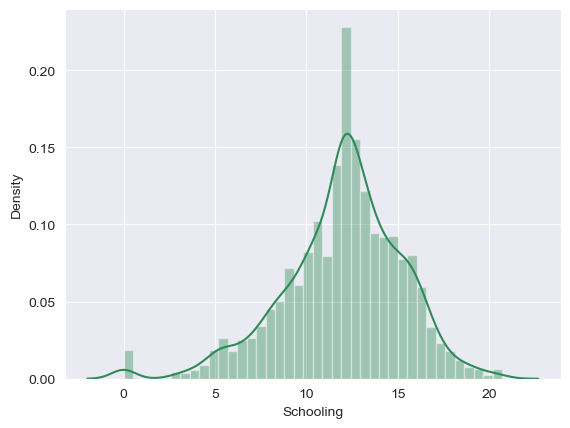

In [47]:
# Histogram of Schooling

sns.distplot(le['Schooling'], color="SeaGreen")

#### Figure 10

In [48]:
# Look at the boxplot and distribution of Life Expectancy based on Country Status 
# Developing countries have lower mean value of life expectancy but developed countries have higher mean value of life expectancy 

fig=px.violin(le,x='Status',y='Life expectancy',color='Status',template='plotly',
              box=True,title='Life Expectancy By Country Status')
fig.show()

#### Figure 11

In [49]:
px.scatter(le,x = 'Adult Mortality', y = 'Life expectancy',color='Status',
           size='Life expectancy',template='plotly',opacity=0.6,
           title='<b> Life Expectancy VS Adult Mortality by Country Status')

#### Figure 12

In [50]:
px.scatter(le,x='Schooling', y='Life expectancy',color='Status',
           size='Life expectancy',template='plotly',opacity=0.6,
           title='<b> Life Expectancy VS Schooling by Country Status')

#### Figure 13

In [51]:
px.scatter(le, x = 'Polio', y = 'Life expectancy',color='Status',
           size='Life expectancy',template='plotly',opacity=0.6,
           title='<b> Life Expectancy VS Polio by Country Status')

#### Figure 14

In [52]:
px.scatter(le, x = 'BMI', y = 'Life expectancy',color='Status',
           size='Life expectancy',template='plotly',opacity=0.6,
           title='<b> Life Expectancy VS BMI on Country Status')

In [53]:
# Present the boxplot visualization of how country and country status affect people's life expectancy 

def le_visual(p):
    """
    Visualize the relationship between `Life expectancy` and categorical feature using box plots
    """
    # Descending order of levels sorted by median
    fig_order = le.groupby([p]).median()["Life expectancy"].sort_values(ascending=False).index

    # Create box plot
    sns.boxplot(x=p,
                y='Life expectancy',
                data=le,
                order=fig_order,
                palette='viridis')

#### Figure 15

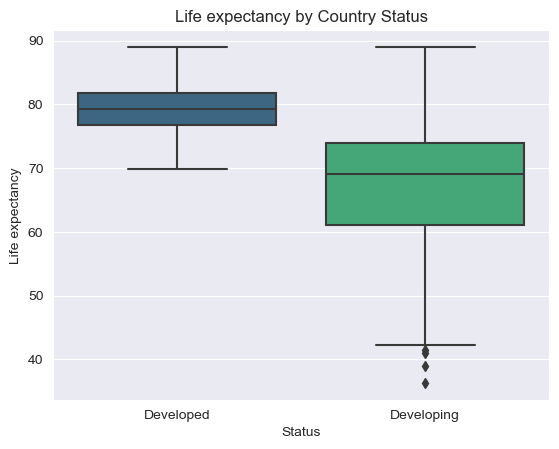

In [54]:
# Boxplot of Developed and Developing countries' life expectancy data
plt.figure()
le_visual('Status')
title = plt.title('Life expectancy by Country Status')

#### Figure 16

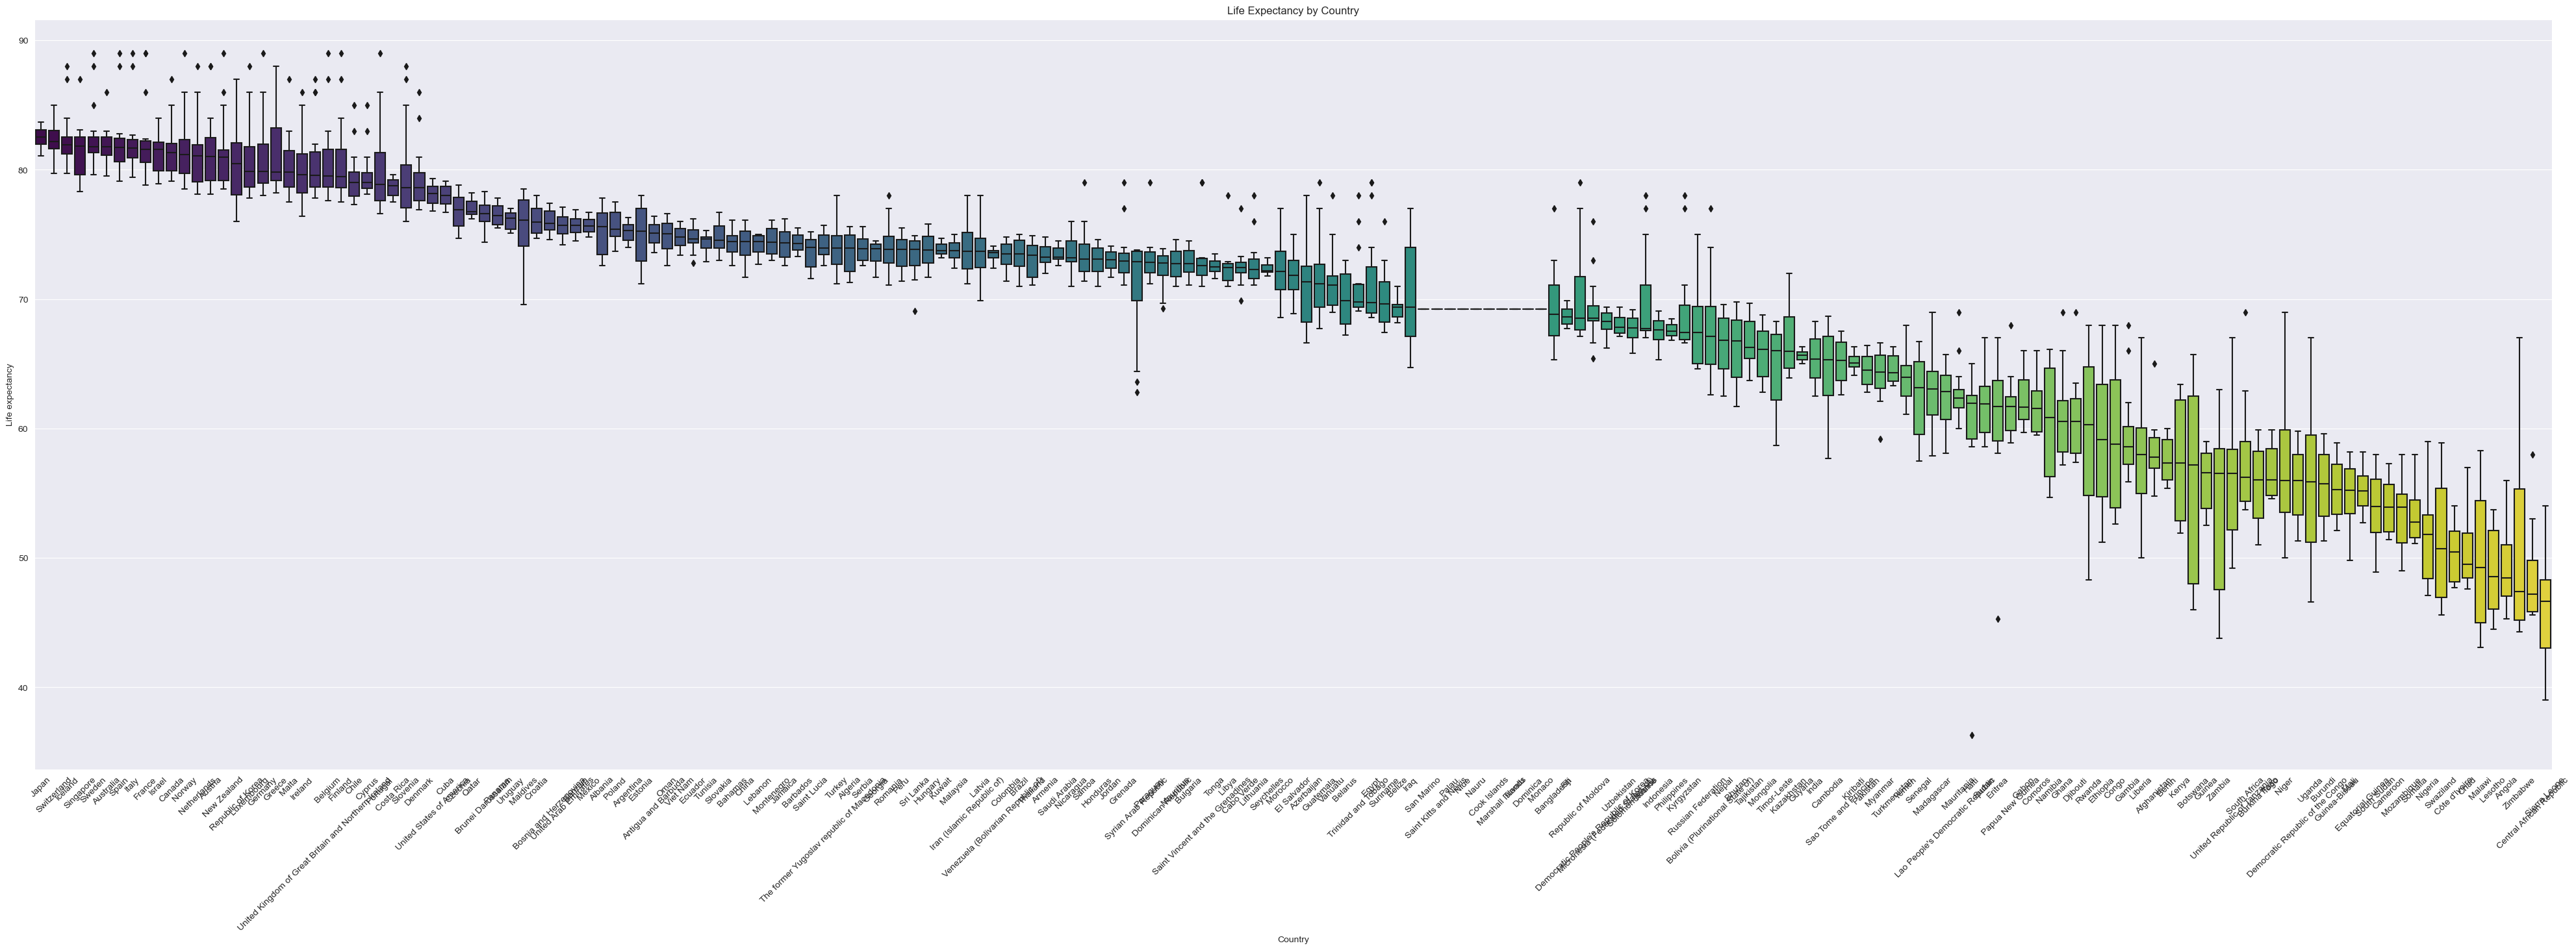

In [55]:
# Boxplot of different countries' life expectancy data
plt.figure(figsize=(50, 15))
le_visual('Country')
title = plt.title('Life Expectancy by Country')
tick = plt.xticks(rotation=45)

### 4.4 Random Forest Model

#### 4.4.1 Modeling One

In [56]:
# Import libraries for Random Forest Model 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [57]:
# Grab the columns required for the regression model from the dataset

le_rgs_list = list(le_rgs.columns)

In [58]:
# Set up regression model dependent and independent variables 

x = le_rgs.drop('Life expectancy',axis= 1)
y = le_rgs['Life expectancy']

# Check the variables
print(x)
print(y)

      Year  Status  Adult Mortality  infant deaths  Alcohol  \
0     2015       1            263.0             62     0.01   
1     2014       1            271.0             64     0.01   
2     2013       1            268.0             66     0.01   
3     2012       1            272.0             69     0.01   
4     2011       1            275.0             71     0.01   
...    ...     ...              ...            ...      ...   
2933  2004       1            723.0             27     4.36   
2934  2003       1            715.0             26     4.06   
2935  2002       1             73.0             25     4.43   
2936  2001       1            686.0             25     1.72   
2937  2000       1            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
0                  71.279624         65.0     1154  19.1                 83   
1                  73.523582         62.0      492  18.6                 86   
2     

In [59]:
# Test and train the regression model 

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=101)
x_train.shape, x_test.shape

((2056, 20), (882, 20))

In [60]:
# Create the random forest model 

le_rf = RandomForestRegressor(random_state=101, n_estimators=10, max_depth=3)

In [61]:
# Fit the variables for the random forest model for training purpose

le_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=101)

In [62]:
# Predict the values from both the x testing data and the training model

predictions = le_rf.predict(x_test)
predictions

array([65.50837324, 55.60459777, 81.51173861, 66.16547049, 62.64487338,
       73.37073762, 68.85988857, 81.51173861, 62.64487338, 81.51173861,
       64.81486354, 71.1712374 , 73.37073762, 73.37073762, 53.71076177,
       73.37073762, 68.85988857, 72.82985307, 63.66161201, 73.37073762,
       59.38272205, 55.60459777, 73.37073762, 71.26831903, 71.26831903,
       53.71076177, 68.85988857, 63.66161201, 72.49903017, 72.49903017,
       54.12627791, 59.38272205, 73.37073762, 73.37073762, 81.51173861,
       71.1712374 , 73.37073762, 64.81486354, 70.63035285, 53.71076177,
       60.39946069, 81.51173861, 64.81486354, 73.37073762, 71.26831903,
       72.82985307, 73.37073762, 74.9857605 , 73.72544818, 68.85988857,
       73.37073762, 81.51173861, 53.03803449, 81.51173861, 62.95815881,
       64.81486354, 81.51173861, 68.85988857, 73.37073762, 54.12627791,
       68.85988857, 66.16547049, 70.61202651, 81.51173861, 72.49903017,
       58.8667491 , 73.37073762, 72.49903017, 81.51173861, 71.84

#### Figure 17

In [63]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

Actual  Predicted
1201    62.5  65.508373
1628    53.6  55.604598
1317    83.3  81.511739
1392    64.3  66.165470
1308    73.5  62.644873
...      ...        ...
917     84.0  81.511739
847     53.5  54.829731
1886    54.5  55.823664
2714    62.3  58.866749
1844    78.1  81.511739

[882 rows x 2 columns]

#### Figure 18

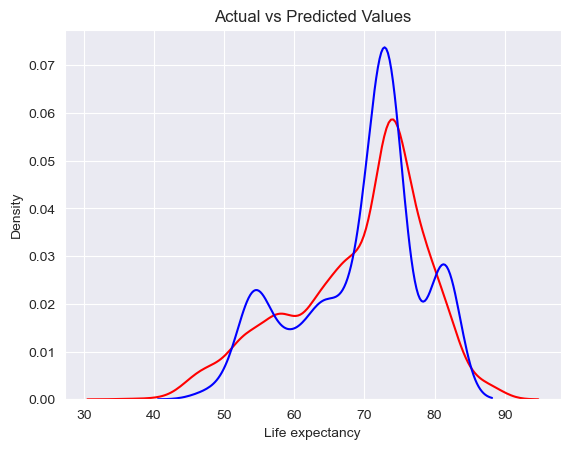

In [64]:
import seaborn as sns

ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Predicted Values" , ax=ax)

plt.title('Actual vs Predicted Values')

plt.show()

In [65]:
# Generate errors by substracting actual value from the predicted value

errors = abs(predictions - y_test)
errors

1201     3.008373
1628     2.004598
1317     1.788261
1392     1.865470
1308    10.855127
          ...    
917      2.488261
847      1.329731
1886     1.323664
2714     3.433251
1844     3.411739
Name: Life expectancy, Length: 882, dtype: float64

In [66]:
# Generate the mean absolute error

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 2.563380011731227
Mean Squared Error: 12.102135255385063
Root Mean Squared Error: 3.47881233402796


In [67]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.13 %.


In [68]:
# Prepare for the data for the random frorest tree visualization 

le_rgs_list = list(le_rgs.columns)
le_rgs_list.remove("Life expectancy")
le_rgs_list

['Year',
 'Status',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV',
 'GDP',
 'Population',
 'thinness 1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

#### Figure 19

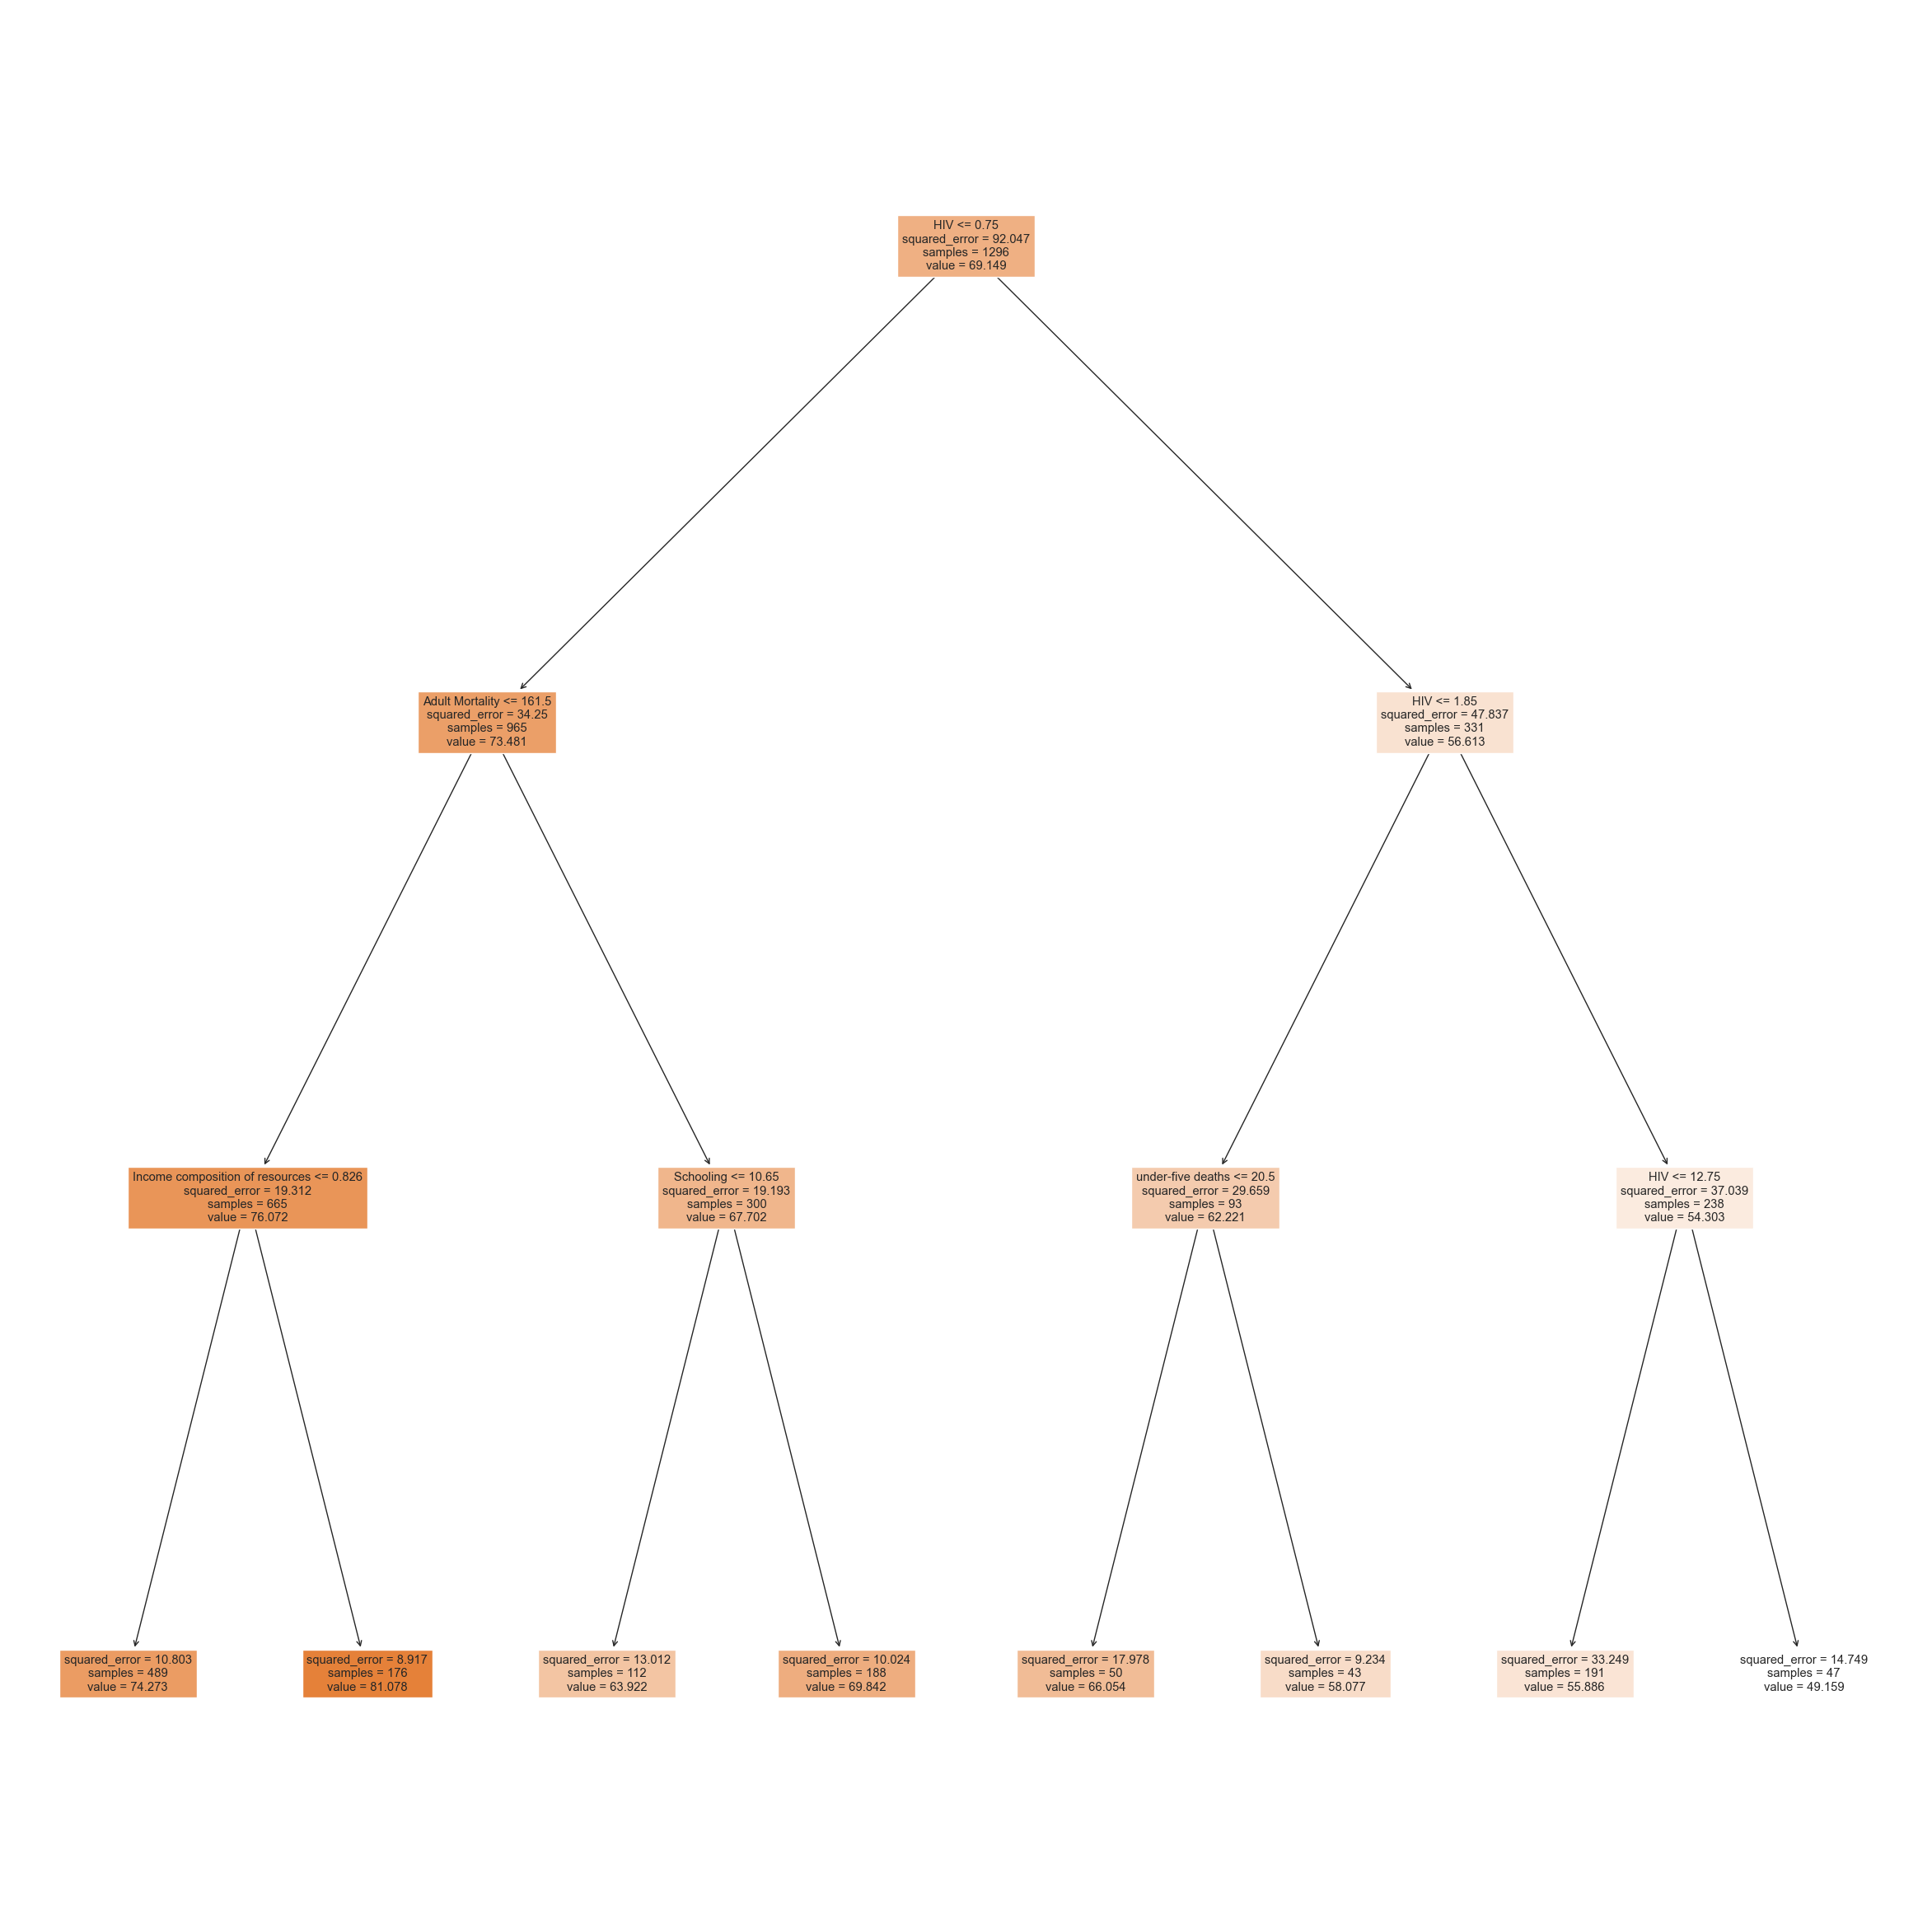

In [69]:
# Presenting the random forest visualization 

trees = le_rf.estimators_[8]
fig = plt.figure(figsize=(30, 30))
_ = tree.plot_tree(trees, feature_names=le_rgs_list, filled=True)

In [70]:
# Prepare for checking the relationship among variables 

importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance':le_rf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

#### Figure 20

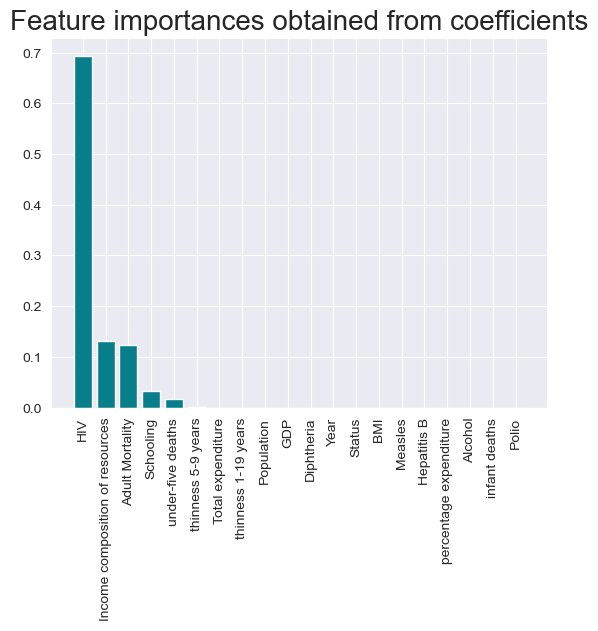

In [71]:
# Check the correlations between independent variables and dependent variables within random forest model

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### 4.4.1 Modeling Two

In [72]:
x = le_rgs.drop(['Life expectancy','Year','Status','infant deaths','Alcohol','percentage expenditure','Hepatitis B'
                 ,'BMI','GDP','thinness 1-19 years','thinness 5-9 years','Population','Measles','Polio',
 'Total expenditure','Diphtheria',], axis =  1
                )
y = le_rgs['Life expectancy']

# Check the variables
print(x)
print(y)

      Adult Mortality  under-five deaths   HIV  \
0               263.0                 83   0.1   
1               271.0                 86   0.1   
2               268.0                 89   0.1   
3               272.0                 93   0.1   
4               275.0                 97   0.1   
...               ...                ...   ...   
2933            723.0                 42  33.6   
2934            715.0                 41  36.7   
2935             73.0                 40  39.8   
2936            686.0                 39  42.1   
2937            665.0                 39  43.5   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407     

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=101)
x_train.shape, x_test.shape

((2056, 5), (882, 5))

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=101)
x_train.shape, x_test.shape

((2056, 5), (882, 5))

In [75]:
le_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=101)

In [76]:
predictions = le_rf.predict(x_test)
predictions

array([65.50837324, 55.60459777, 81.57997302, 66.16547049, 62.64487338,
       73.37073762, 68.85988857, 81.16754714, 62.64487338, 81.57997302,
       64.81486354, 71.1712374 , 73.37073762, 73.37073762, 53.71076177,
       73.37073762, 68.85988857, 72.82985307, 63.66161201, 73.37073762,
       59.38272205, 55.60459777, 73.37073762, 71.26831903, 71.26831903,
       53.71076177, 68.85988857, 63.66161201, 72.49903017, 72.49903017,
       54.12627791, 59.38272205, 73.37073762, 73.37073762, 81.57997302,
       71.1712374 , 73.37073762, 64.81486354, 70.63035285, 53.71076177,
       60.39946069, 81.57997302, 64.81486354, 73.37073762, 71.26831903,
       72.82985307, 73.37073762, 75.19089834, 73.72544818, 68.85988857,
       73.37073762, 81.57997302, 53.03803449, 81.57997302, 62.95815881,
       64.81486354, 81.57997302, 68.85988857, 73.37073762, 54.12627791,
       68.85988857, 66.16547049, 70.61202651, 81.57997302, 72.49903017,
       58.8667491 , 73.37073762, 72.49903017, 81.57997302, 71.84

In [77]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

Actual  Predicted
1201    62.5  65.508373
1628    53.6  55.604598
1317    83.3  81.579973
1392    64.3  66.165470
1308    73.5  62.644873
...      ...        ...
917     84.0  81.579973
847     53.5  54.829731
1886    54.5  55.823664
2714    62.3  58.866749
1844    78.1  81.579973

[882 rows x 2 columns]

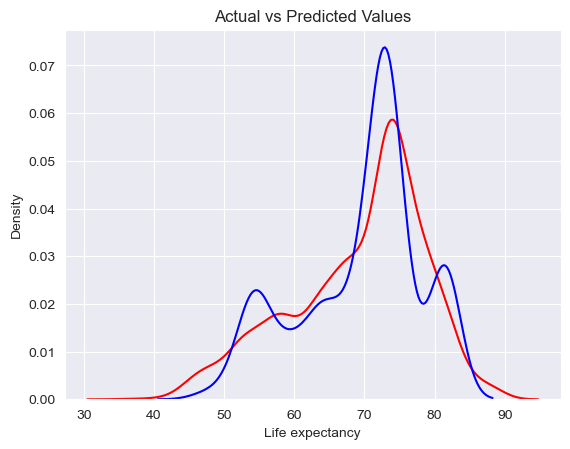

In [78]:
import seaborn as sns

ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Predicted Values" , ax=ax)

plt.title('Actual vs Predicted Values')

plt.show()

In [79]:
errors = abs(predictions - y_test)
errors

1201     3.008373
1628     2.004598
1317     1.720027
1392     1.865470
1308    10.855127
          ...    
917      2.420027
847      1.329731
1886     1.323664
2714     3.433251
1844     3.479973
Name: Life expectancy, Length: 882, dtype: float64

In [80]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 2.5679404953893927
Mean Squared Error: 12.149088045198676
Root Mean Squared Error: 3.485554194844584


In [81]:
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.12 %.
